In [1]:
import numpy as np
import xgboost
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
%matplotlib inline

# Using XGBoost for feature extraction

Tree-based methods can be used for extracting features. Leaf indices are extracted from trees and used as categorical features.

See [this paper (section 3.1, Decision tree feature transforms)](http://quinonero.net/Publications/predicting-clicks-facebook.pdf) for details.

## Extracting leaf indices using XGBoost

In [8]:
def get_leaf_indices(X, y, n_estimators=10, **kwargs):
    num_class = len(set(y))

    xgb_clf = xgboost.XGBClassifier(n_estimators=n_estimators, **kwargs)
    xgb_clf.fit(X, y)
    
    X_pred = xgb_clf._Booster.predict(xgboost.DMatrix(X, label=y), pred_leaf=True)
    
    return X_pred


def setup_booster(dtrain, num_class, num_boost_round, **kwargs):
    return xgboost.train(
        {**{'num_class': num_class, 'max_depth': 3, 'silent': True}, **kwargs},
        dtrain,
        num_boost_round=num_boost_round
    )

## Utilities for similarity search and plotting

In [9]:
def display_digit(digit_vec):
    plt.figure(figsize=(1,1))
    plt.imshow(digit_vec.reshape(8, 8), cmap='gray')
    plt.axis('off')
    
    
def similarity(x, y):
    return (x == y).sum()


def get_similar(query, examples, k):
    similarities = [similarity(query, example) for example in examples]
    sorted_similarities = np.argsort(similarities)[::-1]
    return sorted_similarities[:k]


def show_similarity_results(query, examples, digits, k=5):
    for example in get_similar(query, examples, k):
        display_digit(digits[example])

In [10]:
data = load_digits()
X = data['data']
y = data['target']

In [11]:
X_pred = get_leaf_indices(X, y)

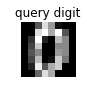

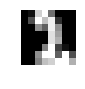

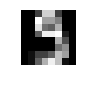

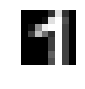

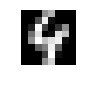

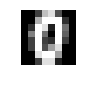

In [12]:
display_digit(X[0])
plt.title('query digit')
plt.show()

show_similarity_results(query=X_pred[0], examples=X_pred[1:], digits=X)